## Predict Housing Prices

#### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

#### EDA

In [2]:
# Load the dataset
df = pd.read_csv("./data/train.csv")

# Display the dataframe
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
# Display of the df info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [5]:
# Fill in missing data
df = df.fillna(df.mean())
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


C:\Users\tyler\AppData\Local\Temp\ipykernel_17536\3694552326.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


C:\Users\tyler\AppData\Local\Temp\ipykernel_17536\2945245283.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


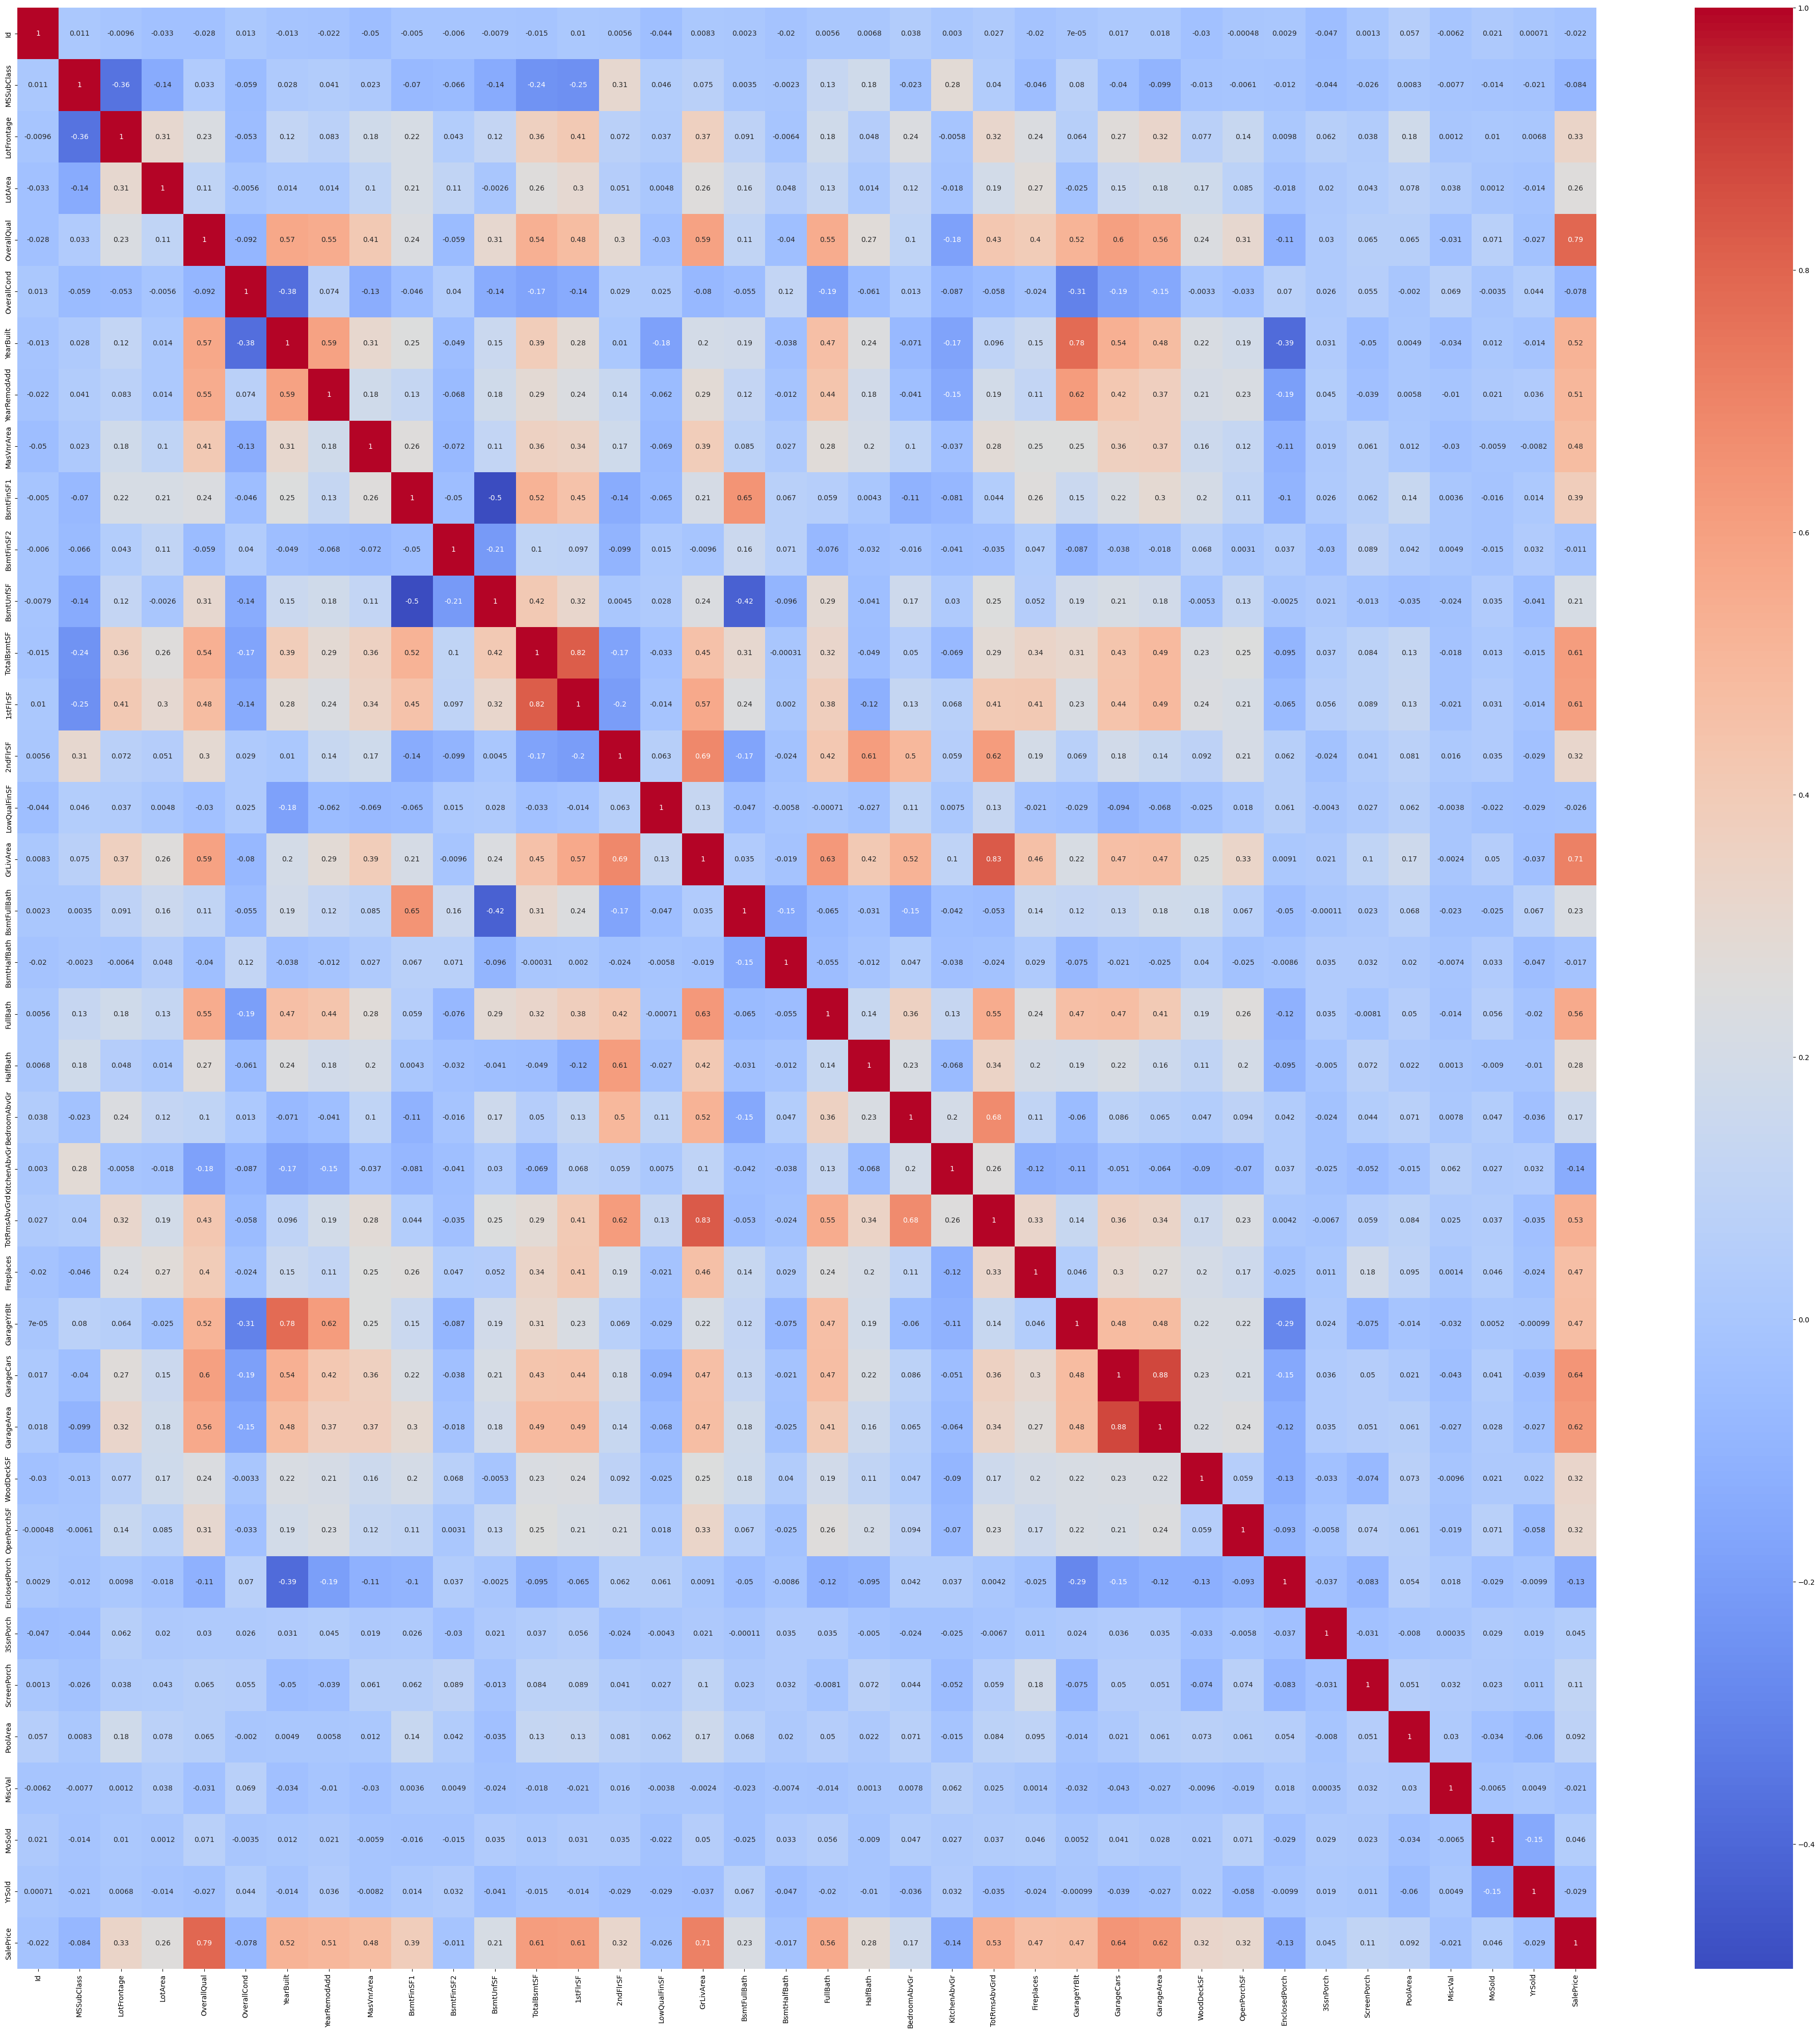

In [6]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [7]:
# Features
features = df.drop('SalePrice', axis=1)
target = df['SalePrice']

In [8]:
# Split the data into training and test set
f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=0.5, random_state=42)
f_train = pd.get_dummies(f_train)
f_test = pd.get_dummies(f_test)

In [9]:
# Training our Model

In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(f_train, t_train)

RandomForestRegressor(random_state=42)

In [11]:
preds = model.predict(f_train)
rmse = mean_squared_error(t_train, preds, squared=False)
print('Root mean squared error: ', rmse)

Root mean squared error:  11706.865791267037


In [12]:
# Output the feature importance
importance = model.feature_importances_

Feature: 0, Score 0.00353
Feature: 1, Score 0.00195
Feature: 2, Score 0.00417
Feature: 3, Score 0.01343
Feature: 4, Score 0.52801
Feature: 5, Score 0.00328
Feature: 6, Score 0.01074
Feature: 7, Score 0.00694
Feature: 8, Score 0.00386
Feature: 9, Score 0.02426
Feature: 10, Score 0.00071
Feature: 11, Score 0.00535
Feature: 12, Score 0.02957
Feature: 13, Score 0.03286
Feature: 14, Score 0.01156
Feature: 15, Score 0.00007
Feature: 16, Score 0.10821
Feature: 17, Score 0.00061
Feature: 18, Score 0.00010
Feature: 19, Score 0.00956
Feature: 20, Score 0.00128
Feature: 21, Score 0.00187
Feature: 22, Score 0.00062
Feature: 23, Score 0.01576
Feature: 24, Score 0.00388
Feature: 25, Score 0.00519
Feature: 26, Score 0.03522
Feature: 27, Score 0.02901
Feature: 28, Score 0.00470
Feature: 29, Score 0.00457
Feature: 30, Score 0.00060
Feature: 31, Score 0.00072
Feature: 32, Score 0.00811
Feature: 33, Score 0.00007
Feature: 34, Score 0.00003
Feature: 35, Score 0.00282
Feature: 36, Score 0.00128
Feature: 37

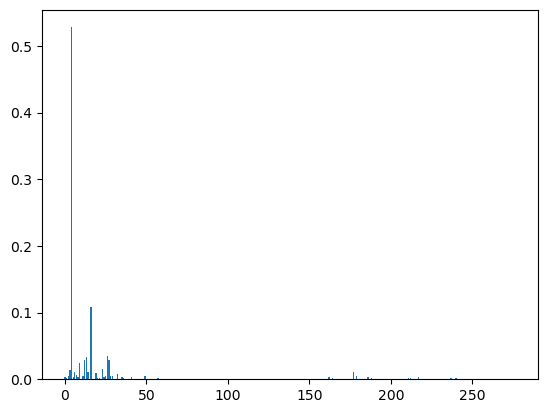

In [13]:
# Summarize feature importance
for i,j in enumerate(importance):
    print('Feature: %0d, Score %.5f' % (i,j))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [14]:
df.iloc[:,16]

0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
         ...  
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: object

### Create our submission

In [15]:
# Load the dataset
features = pd.read_csv("./data/test.csv")

features = features.fillna(features.mean())
features = pd.get_dummies(features)

features = features[f_train.columns]

preds = model.predict(features)

C:\Users\tyler\AppData\Local\Temp\ipykernel_17536\2552660811.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  features = features.fillna(features.mean())


KeyError: "['Utilities_NoSeWa', 'Condition2_RRAn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Roll', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC'] not in index"

In [ ]:
# Create submission CSV
submission = pd.DataFrame({
    "Id": features["Id"],
    "SalePrice": preds
})

#Save the submission dataframe into a csv
submission.to_csv('submission.csv', index=False)